# TP3 : Clustering

## Imports et configuration

In [11]:
# Imports

import collections
import os
import string
import sys

import yake
import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

# Config

data_path = "../data/txt/"

## Charger tous les  fichiers de la décennie et en créer une liste de textes

In [12]:
DECADE = '1930'

files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

# Vérifier si c'est bien 1930: OK
print(files[:5])

texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

# Pour voir à quoi ressemble le premier document: tout est OK
print(texts[0][:400])

# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{DECADE}s.txt'), 'w', encoding="utf-8") as f:
    f.write(' '.join(texts))

['KB_JB838_1930-01-05_01-00006.txt', 'KB_JB838_1930-01-09_01-00001.txt', 'KB_JB838_1930-01-09_01-00014.txt', 'KB_JB838_1930-01-16_01-00010.txt', 'KB_JB838_1930-01-20_01-00002.txt']
15 G I C 3. L ^ SQ| R V .1- . FINANCE - INDUSTRIE - COMMERCE BOURSE de BRUXELLES I Marchés d’Anvers REVUE HEBDOMADAIRE La Eourse, qui avait très peu de chance de g.tg:v»r en aciivi.é penciant cette semaine raccourcie par le congé du Nouvel- Aii, a c i cependant une attitude qui permet de bien augurer des prochaines séances. L's capitalistes semblent enfin s’être rendu compte cours leur fou: quelqu


## Vectoriser les documents à l'aide de TF-IDF

In [13]:
# Création d'une fonction de pré-traitement

def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

# Instancier le modèle TF-IDF avec ses arguments

vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5, #ignorer les mots apparaissant dans plus de 50% des docs
    min_df=0.1, #ignorer les mots apparaissant dans moins de 10% des docs
    lowercase=True #tout mettre en minuscules
)

# Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

tfidf_vectors = vectorizer.fit_transform(texts)

In [14]:
# Imprimer les détails de la matrice

tfidf_vectors

<1000x3941 sparse matrix of type '<class 'numpy.float64'>'
	with 789289 stored elements in Compressed Sparse Row format>

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

In [15]:
# Nbre clusters

N_CLUSTERS = 4

# Instancier le modèle K-Means et ses arguments

km_model = KMeans(n_clusters=N_CLUSTERS)

# Appliquer le clustering à l'aide de la fonction fit_predict

clusters = km_model.fit_predict(tfidf_vectors)

clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [16]:
# Afficher le résultat du clustering (un dictionnaire)

dict(clustering)

{1: ['KB_JB838_1930-01-05_01-00006.txt',
  'KB_JB838_1930-01-09_01-00001.txt',
  'KB_JB838_1930-01-20_01-00002.txt',
  'KB_JB838_1930-01-30_01-00006.txt',
  'KB_JB838_1930-02-05_01-00005.txt',
  'KB_JB838_1930-03-01_01-00004.txt',
  'KB_JB838_1930-03-13_01-00003.txt',
  'KB_JB838_1930-03-21_01-00004.txt',
  'KB_JB838_1930-04-03_01-00004.txt',
  'KB_JB838_1930-04-06_01-00007.txt',
  'KB_JB838_1930-04-07_01-00003.txt',
  'KB_JB838_1930-04-14_01-00006.txt',
  'KB_JB838_1930-04-16_01-00016.txt',
  'KB_JB838_1930-04-22_01-00006.txt',
  'KB_JB838_1930-05-06_01-00008.txt',
  'KB_JB838_1930-05-18_01-00011.txt',
  'KB_JB838_1930-06-16_01-00004.txt',
  'KB_JB838_1930-06-24_01-00004.txt',
  'KB_JB838_1930-07-25_01-00005.txt',
  'KB_JB838_1930-07-26_01-00006.txt',
  'KB_JB838_1930-08-05_01-00004.txt',
  'KB_JB838_1930-08-11_01-00003.txt',
  'KB_JB838_1930-08-17_01-00004.txt',
  'KB_JB838_1930-08-19_01-00003.txt',
  'KB_JB838_1930-08-20_01-00002.txt',
  'KB_JB838_1930-08-21_01-00005.txt',
  'KB_JB8

## Visualiser les clusters

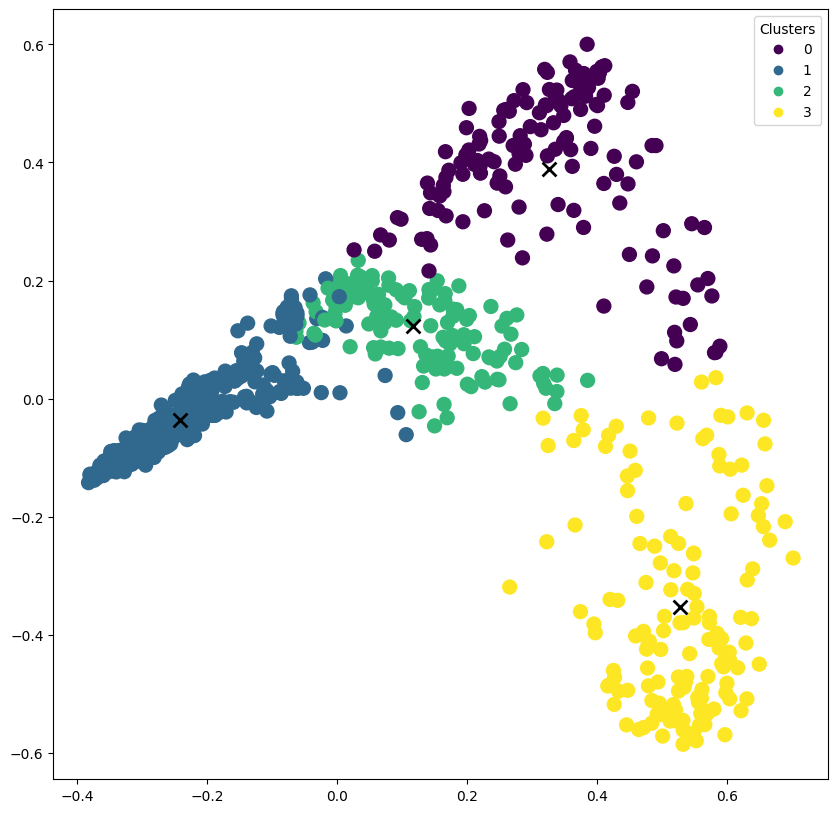

In [17]:
# Réduire les vecteurs à 2 dimensions

pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

# Générer le graphe

x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

## Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

## Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

## Explorer les clusters